In [1]:
import sklearn
import numpy as np
import pandas as pd
# $\sum$

In [2]:
full_data = pd.read_csv("../../datasets/kc_house_data.csv",index_col=0)
full_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
def get_numpy_data(data,features_title,labels_title):
    if ('constant' not in data):
        data['constant'] = 1
    features_title = ['constant'] +  features_title
    feature_matrix = data[features_title].values
    output_array = data[labels_title].values
    
    return (feature_matrix,output_array)
    

In [10]:
def predict_output(feature_matrix, weights):
    return (np.dot(feature_matrix,weights))

computing the derivative  
cost_w = $\sum$(y_hat - y)**2  + l2_penalty * $\sum$ w_sq

RSS = $\sum$(y - y_hat)**2  
and y_hat = w . x  
RSS = $\sum$(y - w.x)**2  

Taking the derivative wrt w 
dRSS/dw = 2 (y - w.x) (-x)  
= 2 (y - y_hat) (-x)  
if we defined (y - y_hat) = error  
= -2 *$\sum$ error * feature

Now the derivative of the regularization term wrt w  
2 * l2_penalty *w  

summing both, we get  

2 * $\sum$( error * feature + 2 * l2_penalty * w



The L2 penalty gets its name because it causes weights to have small L2 norms than otherwise. Let's see how large weights get penalized. Let us consider a simple model with 1 feature:

In [11]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty,is_feature_constant):
    if is_feature_constant:
        derivative = 2 * np.sum(errors)
    #otherwise, derivative is twice the dot product plus 2 *l2_penalty*weight
    else:
        derivative = 2 * np.sum(np.dot(errors,feature)) + 2 * l2_penalty * weight
        
    return derivative
    

In [35]:
def ridge_regression_gd(feature_matrix, output,initial_weights,step_size,l2_penalty,max_iterations=100):
    print(f"starting gd with l2_penalty {str(l2_penalty)}")
    weights = np.array(initial_weights)
    iteration=0
    print_freq =1
    
    while iteration < max_iterations:
        iteration +=1
        if iteration ==10:
            print_freq=10
        if iteration == 100:
            print_freq=100
        if iteration%print_freq ==0:
            print(f"{iteration=}")
            
        #compute the predictions based on feature_matrix and weights using your predict_output func
        predictions = predict_output(feature_matrix,weights)
        #Now compute the errors
        errors = predictions - output
        
        #from time to time print the value of the cost func
        if iteration%print_freq == 0:
            print(f"Cost function {np.dot(errors,errors) + l2_penalty * (np.dot(weights,weights) - weights[0]**2)}")
            
        for i in range(len(weights)):
            #Recall feature_matrix[:,i] is the feature column associated with weights[i]
            #compute the derivative for the weight[i]
            #rem when i=0, you are computing the 
    
            if i==0:
                derivative = feature_derivative_ridge(errors,feature_matrix[:,0],weights[0], l2_penalty,True)
            else:
                derivative = feature_derivative_ridge(errors,feature_matrix[:,i], weights[i],l2_penalty,False)
                
            weights[i] -= step_size * derivative
        
    print(f"Done teh gd at iteration {iteration=}")
    print(f"Learned weights {weights}")
    return weights

In [4]:
simple_features = ['sqft_living']
my_output = 'price'

In [5]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(full_data,train_size=.8,test_size=.2,random_state=0)

lets use only a single feature to predict the price

In [8]:
(simple_feature_matrix, output) = get_numpy_data(train_data,simple_features,my_output)
(simple_test_feature_matrix,test_output) = get_numpy_data(test_data,simple_features,my_output)

In [9]:
initial_weights = np.array([0.,0.])
step_size = 1e-12
max_iterations=1_000

First lets consider no regularization, set the l2_penalty to 0.0 and run your ridge reg to learn the weights of the model.

In [15]:
simple_weights_0_penalty = ridge_regression_gd(simple_feature_matrix,output,initial_weights,step_size,0.0,max_iterations)

starting gd with l2_penalty 0.0
iteration=1
Cost function 7492352980693717.0
iteration=2
Cost function 5443732834808187.0
iteration=3
Cost function 4063835449939597.5
iteration=4
Cost function 3134372368846771.0
iteration=5
Cost function 2508310149584062.5
iteration=6
Cost function 2086610880007097.8
iteration=7
Cost function 1802565191742773.5
iteration=8
Cost function 1611239384833331.0
iteration=9
Cost function 1482367284659914.0
iteration=10
Cost function 1395562381166147.0
iteration=20
Cost function 1219885511283038.8
iteration=30
Cost function 1216508222454018.5
iteration=40
Cost function 1216443295255467.0
iteration=50
Cost function 1216442046328817.8
iteration=60
Cost function 1216442021580795.8
iteration=70
Cost function 1216442020366912.8
iteration=80
Cost function 1216442019605460.5
iteration=90
Cost function 1216442018852706.2
iteration=100
Cost function 1216442018100118.8
iteration=200
Cost function 1216442010574283.8
iteration=300
Cost function 1216442003048457.5
iteratio

now lets set the l2_penalty to 1e11

In [17]:
simple_weights_high_penalty = ridge_regression_gd(simple_feature_matrix,output,initial_weights,step_size,1e11,max_iterations)

starting gd with l2_penalty 100000000000.0
iteration=1
Cost function 7492352980693717.0
iteration=2
Cost function 5668767414760511.0
iteration=3
Cost function 4966162001138451.0
iteration=4
Cost function 4695456615978694.0
iteration=5
Cost function 4591157062537860.0
iteration=6
Cost function 4550971653587026.0
iteration=7
Cost function 4535488645274578.0
iteration=8
Cost function 4529523171698863.0
iteration=9
Cost function 4527224688582535.0
iteration=10
Cost function 4526339052322165.0
iteration=20
Cost function 4525783100988794.0
iteration=30
Cost function 4525782106859238.0
iteration=40
Cost function 4525781152734926.0
iteration=50
Cost function 4525780198613897.0
iteration=60
Cost function 4525779244493268.0
iteration=70
Cost function 4525778290373038.0
iteration=80
Cost function 4525777336253206.0
iteration=90
Cost function 4525776382133774.0
iteration=100
Cost function 4525775428014741.0
iteration=200
Cost function 4525765886846373.0
iteration=300
Cost function 4525756345717926

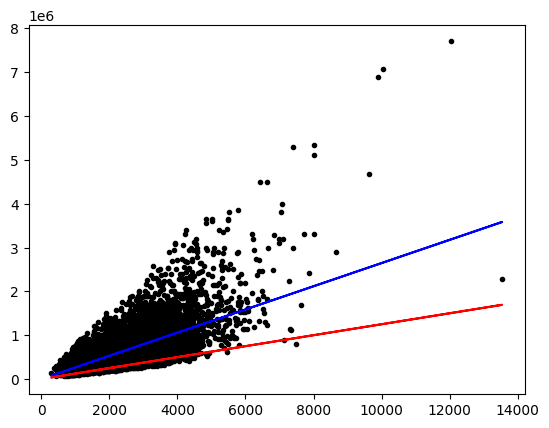

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix[:, 1:], output,'k.',
         simple_feature_matrix[:, 1:], predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
         simple_feature_matrix[:, 1:], predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-');

compute the RSS on the test data for the following 3 sets of weights  
initial weights all 0  
weights learned with no regularization  
weights learned with high regularization

In [27]:
def get_rss(output,feature_mat,weights):
    return np.sum(np.square(output - predict_output(feature_mat,weights)))

In [28]:


# Again, do it in three sets
print("all zeros rss: {}\nno regularization: {}\nhigh regularization: {}"
      .format(get_rss(test_output, simple_test_feature_matrix, initial_weights),
              get_rss(test_output, simple_test_feature_matrix, simple_weights_0_penalty),
              get_rss(test_output, simple_test_feature_matrix, simple_weights_high_penalty)))



all zeros rss: 1724972157778353.0
no regularization: 267785724039172.34
high regularization: 650754968300805.8


In [29]:
model_features = ['sqft_living', 'sqft_living15'] # sqft_living15 is the average squarefeet for the nearest 15 neighbors. 
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

In [30]:
initial_weights=[0.,0.,0.]
step_size=1e-12
max_iterations=1_000

In [36]:
multiple_weights_0_penalty = ridge_regression_gd(feature_matrix,output,initial_weights,step_size,0.0,max_iterations)

starting gd with l2_penalty 0.0
iteration=1
Cost function 7492352980693717.0
iteration=2
Cost function 4100015537310634.0
iteration=3
Cost function 2559550924574728.0
iteration=4
Cost function 1859797380721438.0
iteration=5
Cost function 1541711552960681.0
iteration=6
Cost function 1396898662272782.8
iteration=7
Cost function 1330752397328856.8
iteration=8
Cost function 1300323694547045.8
iteration=9
Cost function 1286114647925854.2
iteration=10
Cost function 1279273617662949.2
iteration=20
Cost function 1267419439007469.2
iteration=30
Cost function 1261408974114915.8
iteration=40
Cost function 1256075260691903.0
iteration=50
Cost function 1251340611311291.2
iteration=60
Cost function 1247137740623208.5
iteration=70
Cost function 1243406921150493.8
iteration=80
Cost function 1240095133792397.8
iteration=90
Cost function 1237155314363555.5
iteration=100
Cost function 1234545684759230.5
iteration=200
Cost function 1220186473013792.8
iteration=300
Cost function 1215824193814158.8
iteratio

In [37]:
multiple_weights_high_penalty = ridge_regression_gd(feature_matrix,output,initial_weights,step_size,1e11,max_iterations)

starting gd with l2_penalty 100000000000.0
iteration=1
Cost function 7492352980693717.0
iteration=2
Cost function 4505351315995476.0
iteration=3
Cost function 3834583288398275.5
iteration=4
Cost function 3683836193524818.0
iteration=5
Cost function 3649883287712293.0
iteration=6
Cost function 3642189242934818.0
iteration=7
Cost function 3640416281547277.5
iteration=8
Cost function 3639989348600833.0
iteration=9
Cost function 3639875240690509.0
iteration=10
Cost function 3639838090592816.0
iteration=20
Cost function 3639801889882883.0
iteration=30
Cost function 3639801135780287.5
iteration=40
Cost function 3639800678437837.0
iteration=50
Cost function 3639800224043187.0
iteration=60
Cost function 3639799769677958.5
iteration=70
Cost function 3639799315313163.5
iteration=80
Cost function 3639798860948515.0
iteration=90
Cost function 3639798406584009.0
iteration=100
Cost function 3639797952219646.0
iteration=200
Cost function 3639793408583893.0
iteration=300
Cost function 3639788864962453

In [38]:


print("all zeros rss: {}\nno regularization: {}\nhigh regularization: {}"
      .format(get_rss(test_output, test_feature_matrix, initial_weights),
              get_rss(test_output, test_feature_matrix, multiple_weights_0_penalty),
              get_rss(test_output, test_feature_matrix, multiple_weights_high_penalty)))



all zeros rss: 1724972157778353.0
no regularization: 266037590365260.84
high regularization: 462809239744846.25
